### Precipitation dataset:
- corrected datasets <br>
  /glade/scratch/arugg <br>
  BC  DS DSBC  <br>
  lat = 496    22.03125, 22.09375, ...... , 52.90625, 52.96875  <br>
  lon = 928  -124.9688, -124.9062, ...... , -67.09375, -67.03125   <br>
  
 
 -  Livneh
 lat = 444 ;  25.15625, 25.21875, ....,  52.78125, 52.84375 <br>
 lon = 922 ;  235.40625, 235.46875, ......, 292.90625, 292.96875 (=-67.03125) <br>

- processed dataset: <br>
  /glade/campaign/mmm/c3we/mingge/CESM,   BC,  DS, DSBC <br>
  prec_yyyymm_mem_DSBC.nc,  prec_yyyymm_mem_BC.nc,  prec_yyyymm_mem_DS.nc <br>
  prec_198001_001_BC.nc, ..., prec_201012_010_DSBC.nc <br>
 
     

In [ ]:
# Kernel casper_2020

In [152]:
# Import packages
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.util as cutil
import matplotlib.ticker as mticker
#from matplotlib import ticker, cm
from matplotlib.colors import LogNorm
from matplotlib.ticker import LogFormatter 
import matplotlib.colors as mcolors
%matplotlib inline
from scipy.stats import pearsonr 

#GeoCAT Specific packages
from geocat.viz import util as gvutil
import geocat.datafiles as gdf
from IPython.display import IFrame
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
#from psif_func import plot_seasonal_4
from importlib import reload
import psif_func
import config
reload(psif_func)
 
from psif_func import plot_diff_3
from psif_func import plot_seasonal
from psif_func import plot_mpas_diff_3
from psif_func import plot_box_shp_3
from psif_func import plot_ts_shp_4
from psif_func import plot_box_shp_4

In [153]:
dir_plot = '/glade/campaign/mmm/c3we/mingge/PSIF/PLOT/'
dir_cesm = '/glade/campaign/mmm/c3we/mingge/CESM/'
dir_liv  = '/glade/campaign/mmm/c3we/mingge/LIVNEH/'

In [154]:
## Livneh
flnm_p95_liv       = 'p95_LIVNEH_1981-2010_wy.nc'
flnm_mean_liv      = 'prec_mean_1981-2010_livneh_wy.nc'
flnm_prec_shp_liv  = 'prec_1981-2010_livneh_shp_wy.nc' 

In [155]:
## CESM
flnm_cesm = 'prec_1981-2010_CESM_LivnehGrid_wy.nc'
flnm_shp_cesm = 'prec_1981-2010_cesm_shp_wy.nc'

## BC
flnm_cesm_bc = 'prec_mean_1981-2010_LivGrd_wy.nc'
flnm_p95_cesm_bc = 'p95_1981-2010_BC_wy.nc'
flnm_shp_cesm_bc = 'prec_mean_1981-2010_BC_shp_wy.nc'
flnm_p95_shp_cesm_bc = 'p95_1981-2010_BC_shp_wy.nc'

# DS
flnm_cesm_ds = 'prec_mean_1981-2010_LivGrd_wy.nc'
flnm_p95_cesm_ds = 'p95_1981-2010_DS_wy.nc'
flnm_shp_cesm_ds = 'prec_mean_1981-2010_DS_shp_wy.nc'
flnm_p95_shp_cesm_ds = 'p95_1981-2010_DS_shp_wy.nc'

# DSBC
flnm_cesm_dsbc = 'prec_mean_1981-2010_LivGrd_wy.nc'
flnm_p95_cesm_dsbc = 'p95_1981-2010_DSBC_wy.nc'
flnm_shp_cesm_dsbc = 'prec_mean_1981-2010_DSBC_shp_wy.nc'
flnm_p95_shp_cesm_dsbc = 'p95_1981-2010_DSBC_shp_wy.nc'


In [156]:
with xr.open_dataset(dir_liv + flnm_mean_liv) as ds_mean_liv:
  print(dir_liv + flnm_mean_liv)  

with xr.open_dataset(dir_liv + flnm_p95_liv) as ds_p95_liv:
  print(dir_liv + flnm_p95_liv) 

with xr.open_dataset(dir_liv + flnm_prec_shp_liv) as ds_prec_shp_liv:
  print(dir_liv + flnm_prec_shp_liv) 

/glade/campaign/mmm/c3we/mingge/LIVNEH/prec_mean_1981-2010_livneh_wy.nc
/glade/campaign/mmm/c3we/mingge/LIVNEH/p95_LIVNEH_1981-2010_wy.nc
/glade/campaign/mmm/c3we/mingge/LIVNEH/prec_1981-2010_livneh_shp_wy.nc


In [157]:
## CESM
with xr.open_dataset(dir_cesm + flnm_cesm ) as ds_prec_cesm:
  print(dir_cesm + flnm_cesm)

with xr.open_dataset(dir_cesm + flnm_shp_cesm ) as ds_prec_shp_cesm:
  print(dir_cesm + flnm_shp_cesm) 

## BC 
with xr.open_dataset(dir_cesm + 'BC/' + flnm_cesm_bc ) as ds_mean_cesm_bc:
  print(dir_cesm + 'BC/' + flnm_cesm_bc)
with xr.open_dataset(dir_cesm + 'BC/' + flnm_p95_cesm_bc ) as ds_p95_cesm_bc:
  print(dir_cesm + 'BC/' + flnm_p95_cesm_bc)

with xr.open_dataset(dir_cesm + 'BC/' + flnm_shp_cesm_bc ) as ds_prec_shp_cesm_bc:
  print(dir_cesm + 'BC/' + flnm_shp_cesm_bc) 
with xr.open_dataset(dir_cesm + 'BC/' + flnm_p95_shp_cesm_bc ) as ds_p95_shp_cesm_bc:
  print(dir_cesm + 'BC/' + flnm_p95_shp_cesm_bc)

## DS 
with xr.open_dataset(dir_cesm + 'DS/' + flnm_cesm_ds) as ds_mean_cesm_ds:
  print(dir_cesm + 'DS/' + flnm_cesm_ds)
with xr.open_dataset(dir_cesm + 'DS/' + flnm_p95_cesm_ds) as ds_p95_cesm_ds:
  print(dir_cesm + 'DS/' + flnm_p95_cesm_ds)

with xr.open_dataset(dir_cesm + 'DS/' + flnm_shp_cesm_ds) as ds_prec_shp_cesm_ds:
  print(dir_cesm + 'DS/' + flnm_shp_cesm_ds) 
with xr.open_dataset(dir_cesm + 'DS/' + flnm_p95_shp_cesm_ds) as ds_p95_shp_cesm_ds:
  print(dir_cesm + 'DS/' + flnm_p95_shp_cesm_ds)

## DSBC 
with xr.open_dataset(dir_cesm + 'DSBC/' + flnm_cesm_dsbc) as ds_mean_cesm_dsbc:
  print(dir_cesm + 'DSBC/' + flnm_cesm_dsbc)
with xr.open_dataset(dir_cesm + 'DSBC/' + flnm_p95_cesm_dsbc) as ds_p95_cesm_dsbc:
  print(dir_cesm + 'DSBC/' + flnm_p95_cesm_dsbc)

with xr.open_dataset(dir_cesm + 'DSBC/' + flnm_shp_cesm_dsbc) as ds_prec_shp_cesm_dsbc:
  print(dir_cesm + 'DSBC/' + flnm_shp_cesm_dsbc) 
with xr.open_dataset(dir_cesm + 'DSBC/' + flnm_p95_shp_cesm_dsbc) as ds_p95_shp_cesm_dsbc:
  print(dir_cesm + 'DSBC/' + flnm_p95_shp_cesm_dsbc)

/glade/campaign/mmm/c3we/mingge/CESM/prec_1981-2010_CESM_LivnehGrid_wy.nc
/glade/campaign/mmm/c3we/mingge/CESM/prec_1981-2010_cesm_shp_wy.nc
/glade/campaign/mmm/c3we/mingge/CESM/BC/prec_mean_1981-2010_LivGrd_wy.nc
/glade/campaign/mmm/c3we/mingge/CESM/BC/p95_1981-2010_BC_wy.nc
/glade/campaign/mmm/c3we/mingge/CESM/BC/prec_mean_1981-2010_BC_shp_wy.nc
/glade/campaign/mmm/c3we/mingge/CESM/BC/p95_1981-2010_BC_shp_wy.nc
/glade/campaign/mmm/c3we/mingge/CESM/DS/prec_mean_1981-2010_LivGrd_wy.nc
/glade/campaign/mmm/c3we/mingge/CESM/DS/p95_1981-2010_DS_wy.nc
/glade/campaign/mmm/c3we/mingge/CESM/DS/prec_mean_1981-2010_DS_shp_wy.nc
/glade/campaign/mmm/c3we/mingge/CESM/DS/p95_1981-2010_DS_shp_wy.nc
/glade/campaign/mmm/c3we/mingge/CESM/DSBC/prec_mean_1981-2010_LivGrd_wy.nc
/glade/campaign/mmm/c3we/mingge/CESM/DSBC/p95_1981-2010_DSBC_wy.nc
/glade/campaign/mmm/c3we/mingge/CESM/DSBC/prec_mean_1981-2010_DSBC_shp_wy.nc
/glade/campaign/mmm/c3we/mingge/CESM/DSBC/p95_1981-2010_DSBC_shp_wy.nc


In [158]:
ds_mean_liv.coords['lon'] = ds_mean_cesm_bc.coords['lon']
ds_p95_liv.coords['lon']  = ds_mean_cesm_bc.coords['lon']
ds_prec_cesm.coords['lon'] = ds_mean_cesm_bc.coords['lon']
ds_mean_liv.coords['year'] = ds_prec_cesm.coords['year']
ds_mean_cesm_ds.coords['year'] = ds_prec_cesm.coords['year']
ds_mean_cesm_bc.coords['year'] = ds_prec_cesm.coords['year']
ds_mean_cesm_dsbc.coords['year'] = ds_prec_cesm.coords['year']
ds_prec_shp_liv.coords['year'] = ds_prec_cesm.coords['year']
ds_prec_shp_cesm.coords['year'] = ds_prec_cesm.coords['year']
ds_prec_shp_cesm_ds.coords['year'] = ds_prec_cesm.coords['year']
ds_prec_shp_cesm_dsbc.coords['year'] = ds_prec_cesm.coords['year']

#### Time Series of Livneh domain average
 - annual precipitation

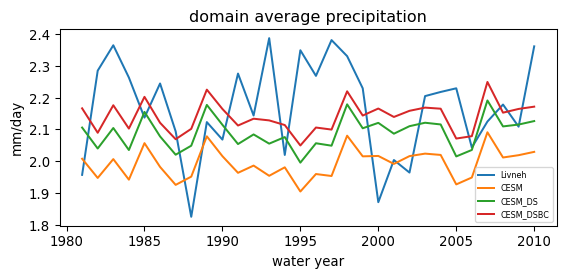

In [169]:
fig = plt.figure(figsize=(6,3), dpi=96)

prec_year_liv  = ds_mean_liv.prec_year_3d.mean(dim=('lat', 'lon'))
prec_year_cesm   = ds_prec_cesm.prec_year_4d.mean(dim=('member','lat', 'lon'))
prec_year_cesm_ds   = ds_mean_cesm_ds.prec_year_4d.mean(dim=('member','lat', 'lon'))
prec_year_cesm_dsbc = ds_mean_cesm_dsbc.prec_year_4d.mean(dim=('member','lat', 'lon'))

# concatenate xarray along a new dimension 'model'
data_2d = xr.concat([prec_year_liv, prec_year_cesm,prec_year_cesm_ds, prec_year_cesm_dsbc] , "model")

models = ["Livneh", "CESM","CESM_DS","CESM_DSBC"]

data_2d['model'] = models
data_2d.plot.line(x="year") 

plt.title("domain average precipitation")
plt.ylabel("mm/day")
plt.tight_layout()
plt.xlabel("water year")
plt.legend(models, prop={'size': 6}, loc='lower right') 

plt.savefig(dir_plot + "prec_us_year_ts.png", bbox_inches='tight') 

 - monthly precipitation

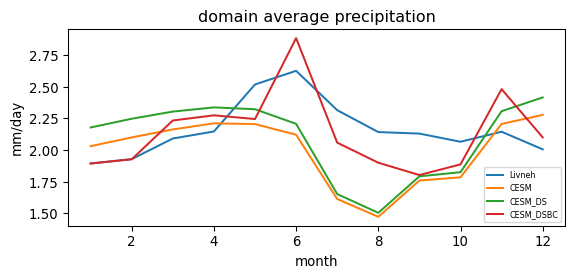

In [170]:
fig = plt.figure(figsize=(6,3), dpi=96)

prec_year_liv  = ds_mean_liv.prec_month_3d.mean(dim=('lat', 'lon'))
prec_year_cesm   = ds_prec_cesm.prec_month_4d.mean(dim=('member','lat', 'lon'))
prec_year_cesm_ds   = ds_mean_cesm_ds.prec_month_4d.mean(dim=('member','lat', 'lon'))
prec_year_cesm_dsbc = ds_mean_cesm_dsbc.prec_month_4d.mean(dim=('member','lat', 'lon'))

# concatenate xarray along a new dimension 'model'
data_2d = xr.concat([prec_year_liv, prec_year_cesm,prec_year_cesm_ds, prec_year_cesm_dsbc] , "model")
 
data_2d['model'] = models
data_2d.plot.line(x="month") 

plt.title("domain average precipitation")
plt.ylabel("mm/day")
plt.legend(models, prop={'size': 6}, loc='lower right') 
plt.tight_layout()

plt.savefig(dir_plot + "prec_us_month_ts.png", bbox_inches='tight') 

#### NWD
 - annual NWD

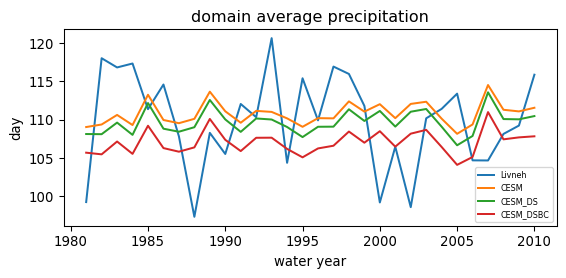

In [171]:
fig = plt.figure(figsize=(6,3), dpi=96)

prec_year_liv  = ds_mean_liv.nwd_year_3d.mean(dim=('lat', 'lon'))
prec_year_cesm   = ds_prec_cesm.nwd_year_4d.mean(dim=('member','lat', 'lon'))
prec_year_cesm_ds   = ds_mean_cesm_ds.nwd_year_4d.mean(dim=('member','lat', 'lon'))
prec_year_cesm_dsbc = ds_mean_cesm_dsbc.nwd_year_4d.mean(dim=('member','lat', 'lon'))

# concatenate xarray along a new dimension 'model'
data_2d = xr.concat([prec_year_liv, prec_year_cesm,prec_year_cesm_ds, prec_year_cesm_dsbc] , "model")
 
data_2d['model'] = ["Livneh", "CESM","CESM_DS","CESM_DSBC"]
data_2d.plot.line(x="year") 

plt.title("domain average precipitation")
plt.ylabel("day")
plt.tight_layout()
plt.xlabel("water year")
plt.legend(models, prop={'size': 6}, loc='lower right') 

plt.savefig(dir_plot + "nwd_us_year_ts.png", bbox_inches='tight') 

 - monthly NWD

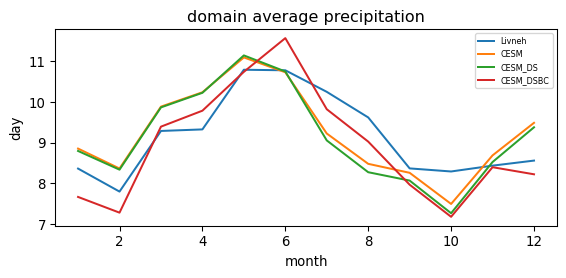

In [172]:
fig = plt.figure(figsize=(6,3), dpi=96)

prec_year_liv  = ds_mean_liv.nwd_month_3d.mean(dim=('lat', 'lon'))
prec_year_cesm   = ds_prec_cesm.nwd_month_4d.mean(dim=('member','lat', 'lon'))
prec_year_cesm_ds   = ds_mean_cesm_ds.nwd_month_4d.mean(dim=('member','lat', 'lon'))
prec_year_cesm_dsbc = ds_mean_cesm_dsbc.nwd_month_4d.mean(dim=('member','lat', 'lon'))

# concatenate xarray along a new dimension 'model'
data_2d = xr.concat([prec_year_liv, prec_year_cesm,prec_year_cesm_ds, prec_year_cesm_dsbc] , "model")
 
data_2d['model'] = ["Livneh", "CESM","CESM_DS","CESM_DSBC"]
data_2d.plot.line(x="month") 

plt.title("domain average precipitation")
plt.ylabel("day")
plt.legend(models, prop={'size': 6}, loc='upper right') 
plt.tight_layout()

plt.savefig(dir_plot + "nwd_us_month_ts.png", bbox_inches='tight') 

#### P99
- annual P99

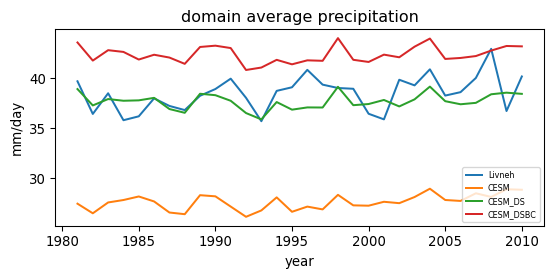

In [173]:
fig = plt.figure(figsize=(6,3), dpi=96)

prec_year_liv       = ds_p95_liv.p99_year_3d.mean(dim=('lat', 'lon'))
prec_year_cesm      = ds_prec_cesm.p99_year_4d.mean(dim=('member','lat', 'lon'))
prec_year_cesm_ds   = ds_p95_cesm_ds.p99_year_4d.mean(dim=('member','lat', 'lon'))
prec_year_cesm_dsbc = ds_p95_cesm_dsbc.p99_year_4d.mean(dim=('member','lat', 'lon'))

# concatenate xarray along a new dimension 'model'
data_2d = xr.concat([prec_year_liv, prec_year_cesm,prec_year_cesm_ds, prec_year_cesm_dsbc] , "model")
 
data_2d['model'] = ["Livneh", "CESM","CESM_DS","CESM_DSBC"]
data_2d.plot.line(x="year") 

plt.title("domain average precipitation")
plt.ylabel("mm/day")
plt.legend(models, prop={'size': 6}, loc='lower right') 
plt.tight_layout()

plt.savefig(dir_plot + "p99_us_year_ts.png", bbox_inches='tight') 

 - seasonal P99

<Figure size 576x384 with 0 Axes>

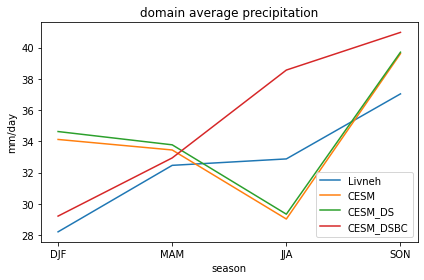

In [174]:
fig = plt.figure(figsize=(6,4), dpi=96)

prec_year_liv       = ds_p95_liv.p99_season_3d.mean(dim=('lat', 'lon'))
prec_year_cesm      = ds_prec_cesm.p99_season_4d.mean(dim=('member','lat', 'lon'))
prec_year_cesm_ds   = ds_p95_cesm_ds.p99_season_4d.mean(dim=('member','lat', 'lon'))
prec_year_cesm_dsbc = ds_p95_cesm_dsbc.p99_season_4d.mean(dim=('member','lat', 'lon'))

# concatenate xarray along a new dimension 'model'
data_2d = xr.concat([prec_year_liv, prec_year_cesm,prec_year_cesm_ds, prec_year_cesm_dsbc] , "model")
 
data_2d['model'] = ["Livneh", "CESM","CESM_DS","CESM_DSBC"]

fig, ax = plt.subplots()

data_2d.plot.line(x="season") 

ax.xaxis.set_ticks(data_2d.season)
ax.set_xticklabels(config.season)

plt.title("domain average precipitation")
plt.ylabel("mm/day")
plt.xlabel("season")
plt.legend(models, prop={'size': 10}, loc='lower right') 
plt.tight_layout()

plt.savefig(dir_plot + "p99_us_season_ts.png", bbox_inches='tight') 

#### P95
 - annual P95

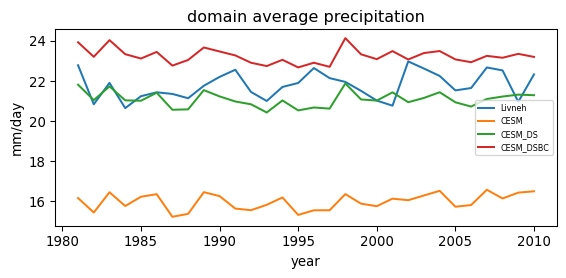

In [175]:
fig = plt.figure(figsize=(6,3), dpi=96)

prec_year_liv       = ds_p95_liv.p95_year_3d.mean(dim=('lat', 'lon'))
prec_year_cesm      = ds_prec_cesm.p95_year_4d.mean(dim=('member','lat', 'lon'))
prec_year_cesm_ds   = ds_p95_cesm_ds.p95_year_4d.mean(dim=('member','lat', 'lon'))
prec_year_cesm_dsbc = ds_p95_cesm_dsbc.p95_year_4d.mean(dim=('member','lat', 'lon'))

# concatenate xarray along a new dimension 'model'
data_2d = xr.concat([prec_year_liv, prec_year_cesm,prec_year_cesm_ds, prec_year_cesm_dsbc] , "model")
 
data_2d['model'] = ["Livneh", "CESM","CESM_DS","CESM_DSBC"]
data_2d.plot.line(x="year") 

plt.title("domain average precipitation")
plt.ylabel("mm/day")
plt.legend(models, prop={'size': 6}, loc='center right') 
plt.tight_layout()

plt.savefig(dir_plot + "p95_us_year_ts.png", bbox_inches='tight') 


 - seasonal P95

<Figure size 576x384 with 0 Axes>

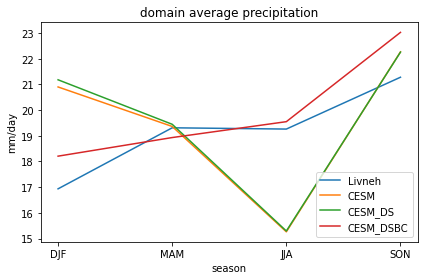

In [176]:
fig = plt.figure(figsize=(6,4), dpi=96)

prec_year_liv       = ds_p95_liv.p95_season_3d.mean(dim=('lat', 'lon'))
prec_year_cesm      = ds_prec_cesm.p95_season_4d.mean(dim=('member','lat', 'lon'))
prec_year_cesm_ds   = ds_p95_cesm_ds.p95_season_4d.mean(dim=('member','lat', 'lon'))
prec_year_cesm_dsbc = ds_p95_cesm_dsbc.p95_season_4d.mean(dim=('member','lat', 'lon'))

# concatenate xarray along a new dimension 'model'
data_2d = xr.concat([prec_year_liv, prec_year_cesm,prec_year_cesm_ds, prec_year_cesm_dsbc] , "model")
 
data_2d['model'] = ["Livneh", "CESM","CESM_DS","CESM_DSBC"]

fig, ax = plt.subplots()

data_2d.plot.line(x="season") 

ax.xaxis.set_ticks(data_2d.season)
ax.set_xticklabels(config.season)

plt.title("domain average precipitation")
plt.ylabel("mm/day")
plt.xlabel("season")
plt.legend(models, prop={'size': 10}, loc='lower right')

plt.tight_layout()

plt.savefig(dir_plot + "p95_us_season_ts.png", bbox_inches='tight') 

#### N99
 - Annual N99

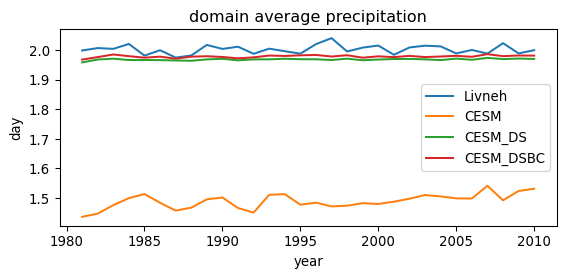

In [177]:
fig = plt.figure(figsize=(6,3), dpi=96)

prec_year_liv       = ds_p95_liv.n99_year_3d.mean(dim=('lat', 'lon'))
prec_year_cesm      = ds_prec_cesm.n99_year_4d.mean(dim=('member','lat', 'lon'))
prec_year_cesm_ds   = ds_p95_cesm_ds.n99_year_4d.mean(dim=('member','lat', 'lon'))
prec_year_cesm_dsbc = ds_p95_cesm_dsbc.n99_year_4d.mean(dim=('member','lat', 'lon'))

# concatenate xarray along a new dimension 'model'
data_2d = xr.concat([prec_year_liv, prec_year_cesm,prec_year_cesm_ds, prec_year_cesm_dsbc] , "model")
 
data_2d['model'] = ["Livneh", "CESM","CESM_DS","CESM_DSBC"]
data_2d.plot.line(x="year") 

plt.title("domain average precipitation")
plt.ylabel("day")
plt.legend(models, prop={'size': 10}, loc='center right')

plt.tight_layout()

plt.savefig(dir_plot + "n99_us_year_ts.png", bbox_inches='tight') 

 - seasonal N99

<Figure size 576x384 with 0 Axes>

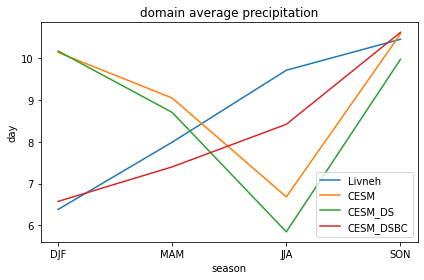

In [178]:
fig = plt.figure(figsize=(6,4), dpi=96)

prec_year_liv       = ds_p95_liv.n99_season_3d.mean(dim=('lat', 'lon'))
prec_year_cesm      = ds_prec_cesm.n99_season_4d.mean(dim=('member','lat', 'lon'))
prec_year_cesm_ds   = ds_p95_cesm_ds.n99_season_4d.mean(dim=('member','lat', 'lon'))
prec_year_cesm_dsbc = ds_p95_cesm_dsbc.n99_season_4d.mean(dim=('member','lat', 'lon'))

# concatenate xarray along a new dimension 'model'
data_2d = xr.concat([prec_year_liv, prec_year_cesm,prec_year_cesm_ds, prec_year_cesm_dsbc] , "model")
 
data_2d['model'] = ["Livneh", "CESM","CESM_DS","CESM_DSBC"]

fig, ax = plt.subplots()

data_2d.plot.line(x="season") 

ax.xaxis.set_ticks(data_2d.season)
ax.set_xticklabels(config.season)

plt.title("domain average precipitation")
plt.ylabel("day")
plt.xlabel("season")
plt.legend(models, prop={'size': 10}, loc='lower right')

plt.tight_layout()

plt.savefig(dir_plot + "n99_us_season_ts.png", bbox_inches='tight') 

#### N95
 - annual N95

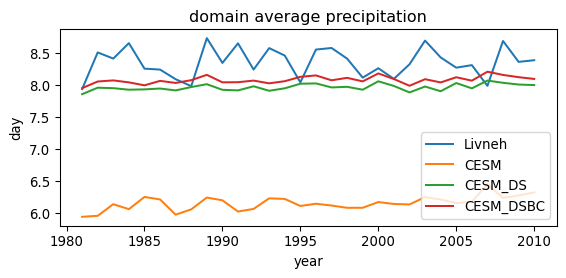

In [179]:
fig = plt.figure(figsize=(6,3), dpi=96)

prec_year_liv       = ds_p95_liv.n95_year_3d.mean(dim=('lat', 'lon'))
prec_year_cesm      = ds_prec_cesm.n95_year_4d.mean(dim=('member','lat', 'lon'))
prec_year_cesm_ds   = ds_p95_cesm_ds.n95_year_4d.mean(dim=('member','lat', 'lon'))
prec_year_cesm_dsbc = ds_p95_cesm_dsbc.n95_year_4d.mean(dim=('member','lat', 'lon'))

# concatenate xarray along a new dimension 'model'
data_2d = xr.concat([prec_year_liv, prec_year_cesm,prec_year_cesm_ds, prec_year_cesm_dsbc] , "model")
 
data_2d['model'] = ["Livneh", "CESM","CESM_DS","CESM_DSBC"]
data_2d.plot.line(x="year") 

plt.title("domain average precipitation")
plt.ylabel("day")
plt.legend(models, prop={'size': 10}, loc='lower right')
plt.tight_layout()

plt.savefig(dir_plot + "n95_us_year_ts.png", bbox_inches='tight') 

 - seasonal N95

<Figure size 576x384 with 0 Axes>

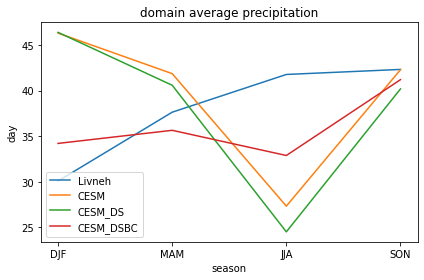

In [180]:
fig = plt.figure(figsize=(6,4), dpi=96)

prec_year_liv       = ds_p95_liv.n95_season_3d.mean(dim=('lat', 'lon'))
prec_year_cesm      = ds_prec_cesm.n95_season_4d.mean(dim=('member','lat', 'lon'))
prec_year_cesm_ds   = ds_p95_cesm_ds.n95_season_4d.mean(dim=('member','lat', 'lon'))
prec_year_cesm_dsbc = ds_p95_cesm_dsbc.n95_season_4d.mean(dim=('member','lat', 'lon'))

# concatenate xarray along a new dimension 'model'
data_2d = xr.concat([prec_year_liv, prec_year_cesm,prec_year_cesm_ds, prec_year_cesm_dsbc] , "model")
 
data_2d['model'] = ["Livneh", "CESM","CESM_DS","CESM_DSBC"]

fig, ax = plt.subplots()

data_2d.plot.line(x="season") 

ax.xaxis.set_ticks(data_2d.season)
ax.set_xticklabels(config.season)

plt.title("domain average precipitation")
plt.ylabel("day")
plt.xlabel("season")
plt.legend(models, prop={'size': 10}, loc='lower left')
plt.tight_layout()

plt.savefig(dir_plot + "n95_us_season_ts.png", bbox_inches='tight') 

#### Time Series of 18 HUC2 areas
 - monthly precipitation

/glade/campaign/mmm/c3we/mingge/PSIF/PLOT/ prec_month_ts_huc2.png


<Figure size 1008x432 with 0 Axes>

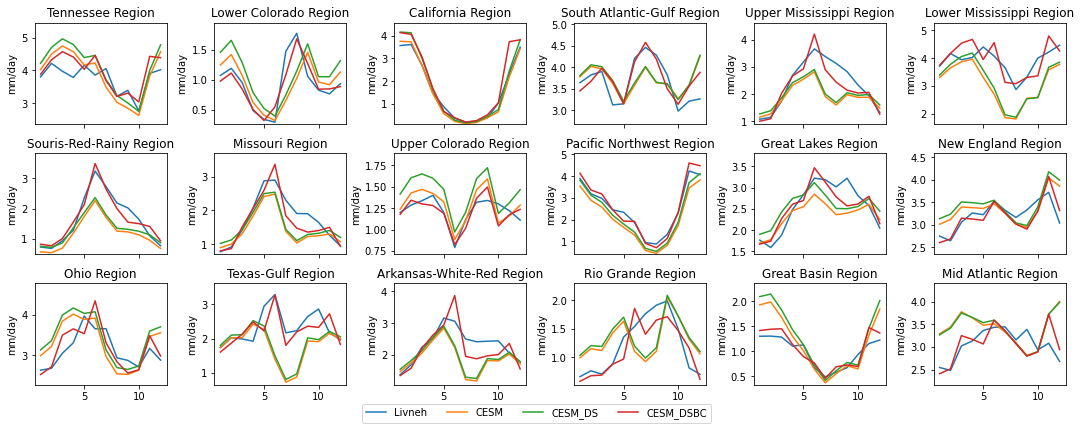

In [182]:
fig = plt.figure(figsize=(14,6))

prec_month_liv       = ds_prec_shp_liv.prec_month_3d
prec_month_cesm      = ds_prec_shp_cesm.prec_month_4d.mean(dim='member')
prec_month_cesm_ds   = ds_prec_shp_cesm_ds.prec_month_4d.mean(dim='member')
prec_month_cesm_dsbc = ds_prec_shp_cesm_dsbc.prec_month_4d.mean(dim='member')

# coordinates
month = range(1,13, 1)
models  = range(1,5, 1)

labels=['Livneh','CESM','CESM_DS', 'CESM_DSBC']
# concatenate xarray along a dimension 'none' and then change it to  'model'
data_3d = xr.concat([prec_month_liv, prec_month_cesm, prec_month_cesm_ds, prec_month_cesm_dsbc] , "none")
 
# add coordinates and dimension rename
data_3d=xr.DataArray(data_3d, coords=[month, range(1,19,1), models], dims=["month", "huc2", 'model'])
               
plot_ts_shp_4(data_3d, labels, 'month', 'mm/day')

plt.savefig(dir_plot + "prec_month_ts_huc2.png")
print(dir_plot, "prec_month_ts_huc2.png")  

 - monthly NWD

<Figure size 1008x432 with 0 Axes>

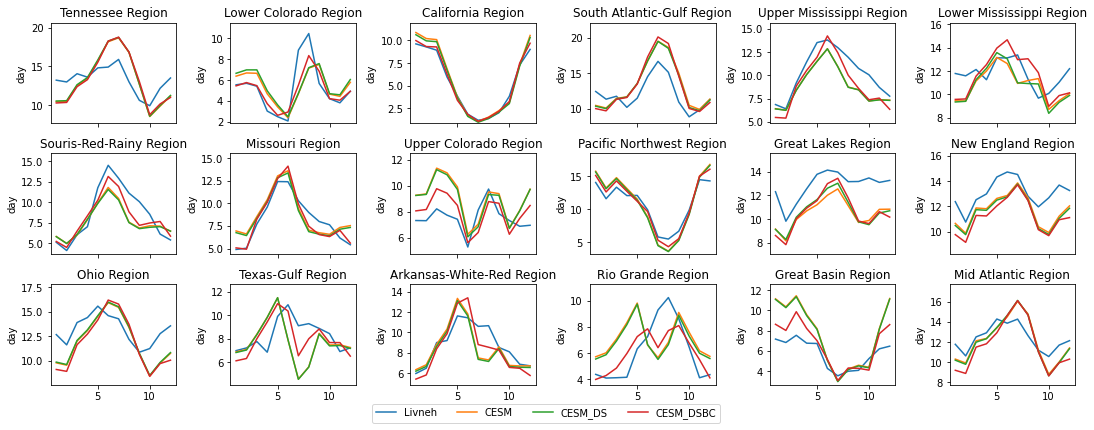

In [183]:
fig = plt.figure(figsize=(14,6))

prec_month_liv       = ds_prec_shp_liv.nwd_month_3d
prec_month_cesm      = ds_prec_shp_cesm.nwd_month_4d.mean(dim='member')
prec_month_cesm_ds   = ds_prec_shp_cesm_ds.nwd_month_4d.mean(dim='member')
prec_month_cesm_dsbc = ds_prec_shp_cesm_dsbc.nwd_month_4d.mean(dim='member')

# coordinates
month = range(1,13, 1)
models  = range(1,5, 1)

labels=['Livneh','CESM','CESM_DS', 'CESM_DSBC']
# concatenate xarray along a dimension 'none' and then change it to  'model'
data_3d = xr.concat([prec_month_liv, prec_month_cesm, prec_month_cesm_ds, prec_month_cesm_dsbc] , "none")
 
# add coordinates and dimension rename
data_3d=xr.DataArray(data_3d, coords=[month, range(1,19,1), models], dims=["month", "huc2", 'model'])
               
plot_ts_shp_4(data_3d, labels, 'month', 'day')

plt.savefig(dir_plot + "nwd_month_ts_huc2.png")

#### Seasonal
 - precipitation

/glade/campaign/mmm/c3we/mingge/PSIF/PLOT/ prec_season_ts_huc2.png


<Figure size 1008x432 with 0 Axes>

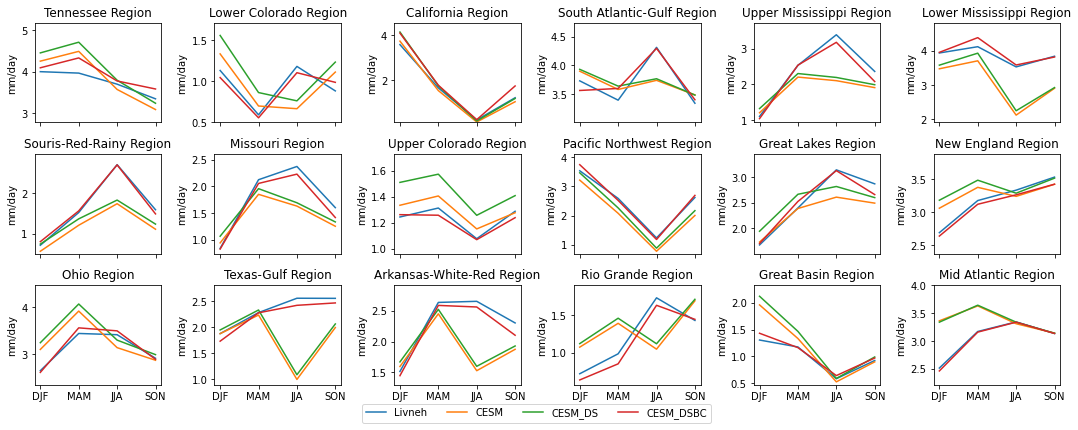

In [194]:
fig = plt.figure(figsize=(14,6))

prec_month_liv       = ds_prec_shp_liv.prec_season_3d
prec_month_cesm      = ds_prec_shp_cesm.prec_season_4d.mean(dim='member')
prec_month_cesm_ds   = ds_prec_shp_cesm_ds.prec_season_4d.mean(dim='member')
prec_month_cesm_dsbc = ds_prec_shp_cesm_dsbc.prec_season_4d.mean(dim='member')

# coordinates
season  = range(1,5, 1)
models  = range(1,5, 1)

labels=['Livneh','CESM','CESM_DS', 'CESM_DSBC']
# concatenate xarray along a dimension 'none' and then change it to  'model'
data_3d = xr.concat([prec_month_liv, prec_month_cesm, prec_month_cesm_ds, prec_month_cesm_dsbc] , "none")
 
# add coordinates and dimension rename
data_3d=xr.DataArray(data_3d, coords=[season, range(1,19,1), models], dims=["season", "huc2", 'model'])
               
plot_ts_shp_4(data_3d, labels, 'season', 'mm/day')

plt.savefig(dir_plot + "prec_season_ts_huc2.png")
print(dir_plot, "prec_season_ts_huc2.png")  

 - NWD

<Figure size 1008x432 with 0 Axes>

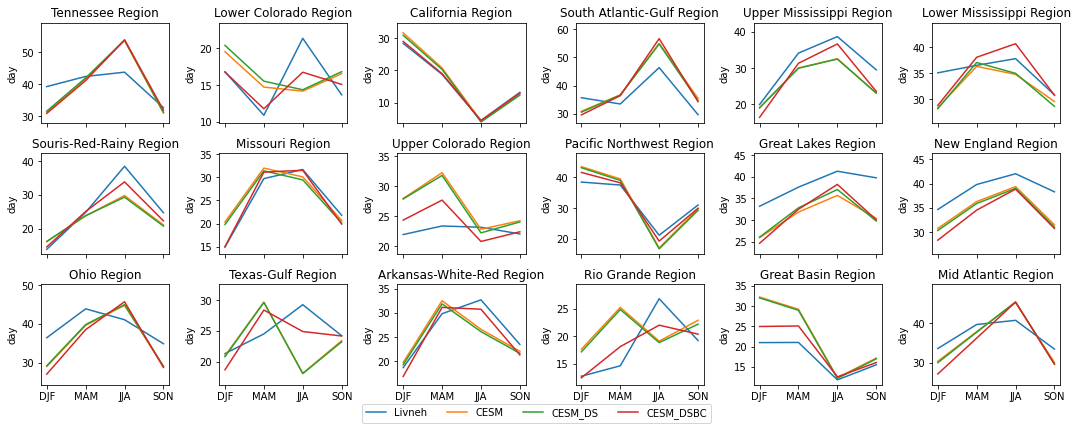

In [184]:
fig = plt.figure(figsize=(14,6))

prec_month_liv       = ds_prec_shp_liv.nwd_season_3d
prec_month_cesm      = ds_prec_shp_cesm.nwd_season_4d.mean(dim='member')
prec_month_cesm_ds   = ds_prec_shp_cesm_ds.nwd_season_4d.mean(dim='member')
prec_month_cesm_dsbc = ds_prec_shp_cesm_dsbc.nwd_season_4d.mean(dim='member')

# coordinates
season  = range(1,5, 1)
models  = range(1,5, 1)

labels=['Livneh','CESM','CESM_DS', 'CESM_DSBC']
# concatenate xarray along a dimension 'none' and then change it to  'model'
data_3d = xr.concat([prec_month_liv, prec_month_cesm, prec_month_cesm_ds, prec_month_cesm_dsbc] , "none")
 
# add coordinates and dimension rename
data_3d=xr.DataArray(data_3d, coords=[season, range(1,19,1), models], dims=["season", "huc2", 'model'])
               
plot_ts_shp_4(data_3d, labels, 'season', 'day')

plt.savefig(dir_plot + "nwd_season_ts_huc2.png")
   

 - P99

<Figure size 1008x432 with 0 Axes>

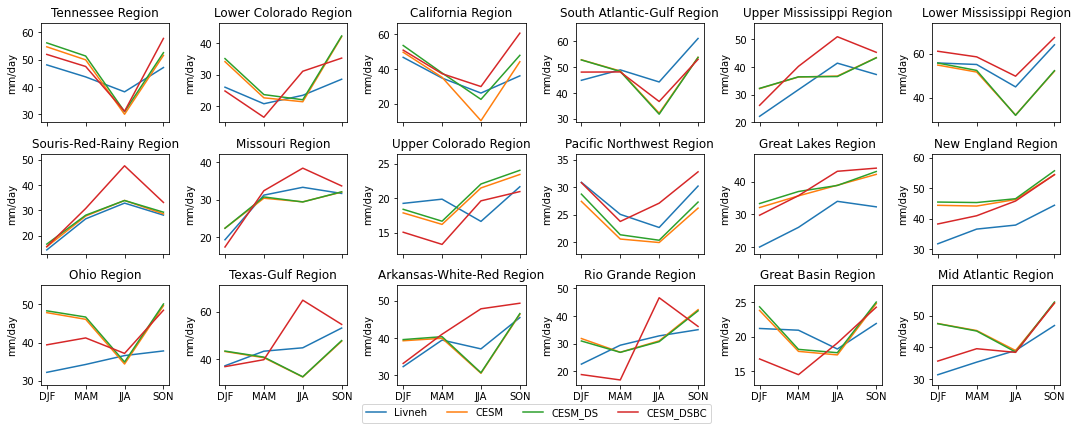

In [185]:
fig = plt.figure(figsize=(14,6))

prec_month_liv       = ds_prec_shp_liv.p99_season_3d
prec_month_cesm      = ds_prec_shp_cesm.p99_season_4d.mean(dim='member')
prec_month_cesm_ds   = ds_p95_shp_cesm_ds.p99_season_4d.mean(dim='member')
prec_month_cesm_dsbc = ds_p95_shp_cesm_dsbc.p99_season_4d.mean(dim='member')

# coordinates
season  = range(1,5, 1)
models  = range(1,5, 1)

labels=['Livneh','CESM','CESM_DS', 'CESM_DSBC']
# concatenate xarray along a dimension 'none' and then change it to  'model'
data_3d = xr.concat([prec_month_liv, prec_month_cesm, prec_month_cesm_ds, prec_month_cesm_dsbc] , "none")
 
# add coordinates and dimension rename
data_3d=xr.DataArray(data_3d, coords=[season, range(1,19,1), models], dims=["season", "huc2", 'model'])
               
plot_ts_shp_4(data_3d, labels, 'season', 'mm/day')

plt.savefig(dir_plot + "p99_season_ts_huc2.png")

 - P95

<Figure size 1008x432 with 0 Axes>

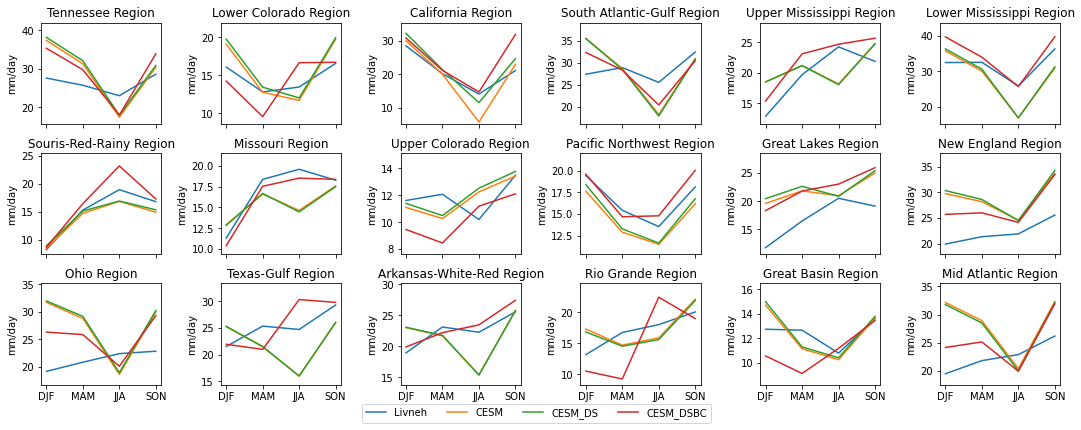

In [186]:
fig = plt.figure(figsize=(14,6))

prec_month_liv       = ds_prec_shp_liv.p95_season_3d
prec_month_cesm      = ds_prec_shp_cesm.p95_season_4d.mean(dim='member')
prec_month_cesm_ds   = ds_p95_shp_cesm_ds.p95_season_4d.mean(dim='member')
prec_month_cesm_dsbc = ds_p95_shp_cesm_dsbc.p95_season_4d.mean(dim='member')

# coordinates
season  = range(1,5, 1)
models  = range(1,5, 1)

labels=['Livneh','CESM','CESM_DS', 'CESM_DSBC']
# concatenate xarray along a dimension 'none' and then change it to  'model'
data_3d = xr.concat([prec_month_liv, prec_month_cesm, prec_month_cesm_ds, prec_month_cesm_dsbc] , "none")
 
# add coordinates and dimension rename
data_3d=xr.DataArray(data_3d, coords=[season, range(1,19,1), models], dims=["season", "huc2", 'model'])
               
plot_ts_shp_4(data_3d, labels, 'season', 'mm/day')

plt.savefig(dir_plot + "p95_season_ts_huc2.png")

 - N99

<Figure size 1008x432 with 0 Axes>

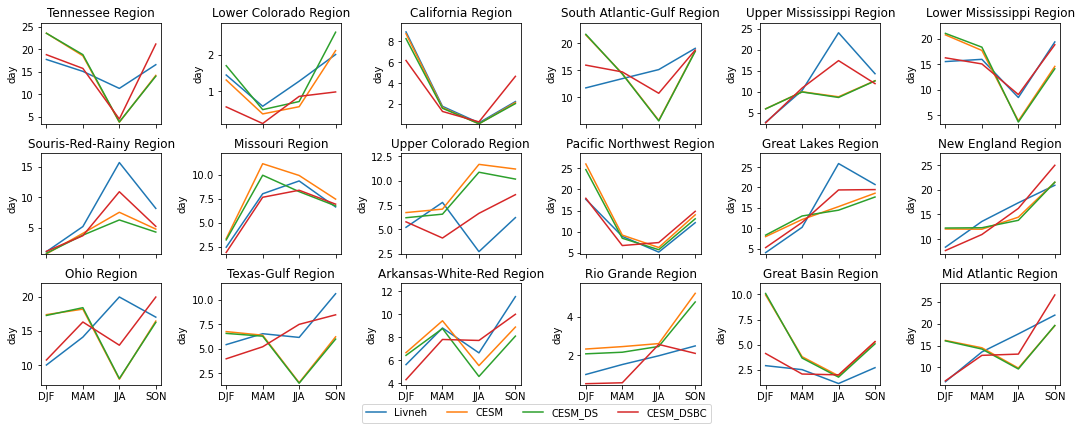

In [187]:
fig = plt.figure(figsize=(14,6))

prec_month_liv       = ds_prec_shp_liv.n99_season_3d
prec_month_cesm      = ds_prec_shp_cesm.n99_season_4d.mean(dim='member')
prec_month_cesm_ds   = ds_p95_shp_cesm_ds.n99_season_4d.mean(dim='member')
prec_month_cesm_dsbc = ds_p95_shp_cesm_dsbc.n99_season_4d.mean(dim='member')

# coordinates
season  = range(1,5, 1)
models  = range(1,5, 1)

labels=['Livneh','CESM','CESM_DS', 'CESM_DSBC']
# concatenate xarray along a dimension 'none' and then change it to  'model'
data_3d = xr.concat([prec_month_liv, prec_month_cesm, prec_month_cesm_ds, prec_month_cesm_dsbc] , "none")
 
# add coordinates and dimension rename
data_3d=xr.DataArray(data_3d, coords=[season, range(1,19,1), models], dims=["season", "huc2", 'model'])
               
plot_ts_shp_4(data_3d, labels, 'season', 'day')

plt.savefig(dir_plot + "n99_season_ts_huc2.png")

 - N95

<Figure size 1008x432 with 0 Axes>

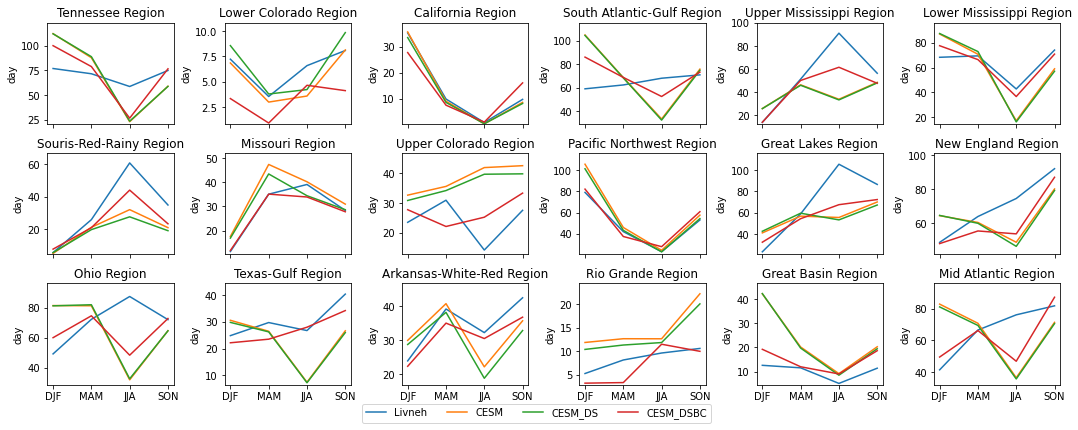

In [188]:
fig = plt.figure(figsize=(14,6))

prec_month_liv       = ds_prec_shp_liv.n95_season_3d
prec_month_cesm      = ds_prec_shp_cesm.n95_season_4d.mean(dim='member')
prec_month_cesm_ds   = ds_p95_shp_cesm_ds.n95_season_4d.mean(dim='member')
prec_month_cesm_dsbc = ds_p95_shp_cesm_dsbc.n95_season_4d.mean(dim='member')

# coordinates
season  = range(1,5, 1)
models  = range(1,5, 1)

labels=['Livneh','CESM','CESM_DS', 'CESM_DSBC']
# concatenate xarray along a dimension 'none' and then change it to  'model'
data_3d = xr.concat([prec_month_liv, prec_month_cesm, prec_month_cesm_ds, prec_month_cesm_dsbc] , "none")
 
# add coordinates and dimension rename
data_3d=xr.DataArray(data_3d, coords=[season, range(1,19,1), models], dims=["season", "huc2", 'model'])
               
plot_ts_shp_4(data_3d, labels, 'season', 'day')

plt.savefig(dir_plot + "n95_season_ts_huc2.png")

#### boxplot
 - prec

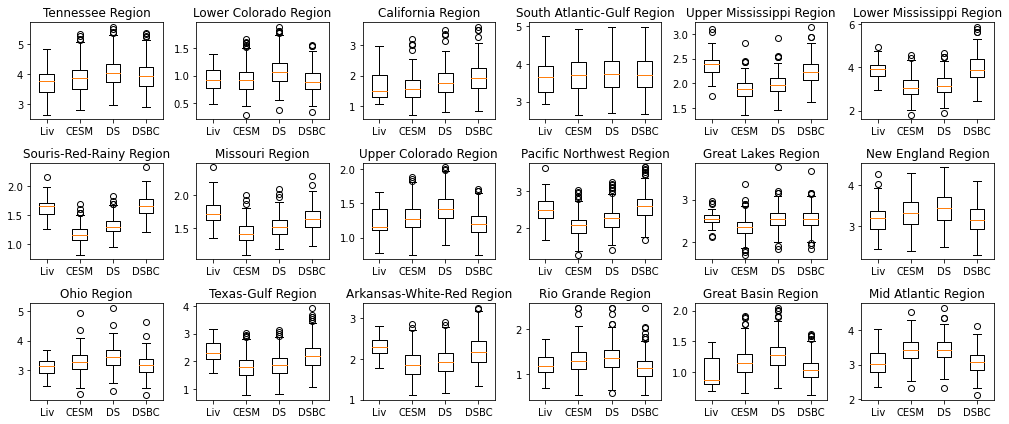

In [189]:
fig = plt.figure(figsize=(14,6))

prec_year_liv       = ds_prec_shp_liv.prec_year_3d
prec_year_cesm      = ds_prec_shp_cesm.prec_year_4d
prec_year_cesm_ds   = ds_prec_shp_cesm_ds.prec_year_4d 
prec_year_cesm_dsbc = ds_prec_shp_cesm_dsbc.prec_year_4d

# use where to define missing value and then
# remove missing value with dropna
prec_year_liv       = prec_year_liv.where      (prec_year_liv < 1000, drop=True).dropna('year',how='any')
prec_year_cesm      = prec_year_cesm.where     (prec_year_cesm < 1000, drop=True).dropna('year',how='any')
prec_year_cesm_ds   = prec_year_cesm_ds.where  (prec_year_cesm_ds < 1000, drop=True).dropna('year',how='any')
prec_year_cesm_dsbc = prec_year_cesm_dsbc.where(prec_year_cesm_dsbc < 1000, drop=True).dropna('year',how='any')

plot_box_shp_4(prec_year_liv, prec_year_cesm, prec_year_cesm_ds, prec_year_cesm_dsbc)

plt.savefig(dir_plot + "prec_box_huc2.png")

 - nwd

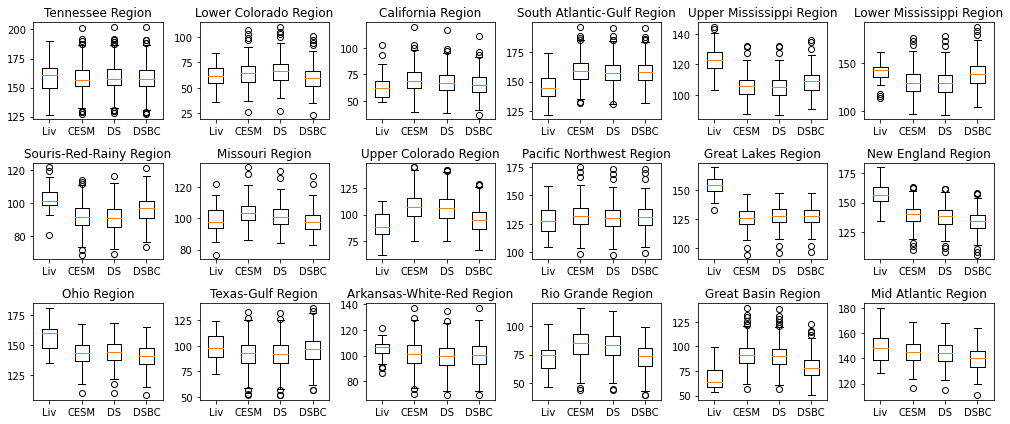

In [190]:
fig = plt.figure(figsize=(14,6))

prec_year_liv       = ds_prec_shp_liv.nwd_year_3d
prec_year_cesm      = ds_prec_shp_cesm.nwd_year_4d
prec_year_cesm_ds   = ds_prec_shp_cesm_ds.nwd_year_4d 
prec_year_cesm_dsbc = ds_prec_shp_cesm_dsbc.nwd_year_4d 

# use where to define missing value and then
# remove missing value with dropna
prec_year_liv = prec_year_liv.where( prec_year_liv < 1000, drop=True).dropna('year',how='any')
prec_year_cesm = prec_year_cesm.where( prec_year_cesm < 1000, drop=True).dropna('year',how='any')
prec_year_cesm_ds = prec_year_cesm_ds.where( prec_year_cesm_ds < 1000, drop=True).dropna('year',how='any')
prec_year_cesm_dsbc = prec_year_cesm_dsbc.where( prec_year_cesm_dsbc < 1000, drop=True).dropna('year',how='any')

plot_box_shp_4(prec_year_liv, prec_year_cesm, prec_year_cesm_ds, prec_year_cesm_dsbc)

plt.savefig(dir_plot + "nwd_box_huc2.png")

 - P99

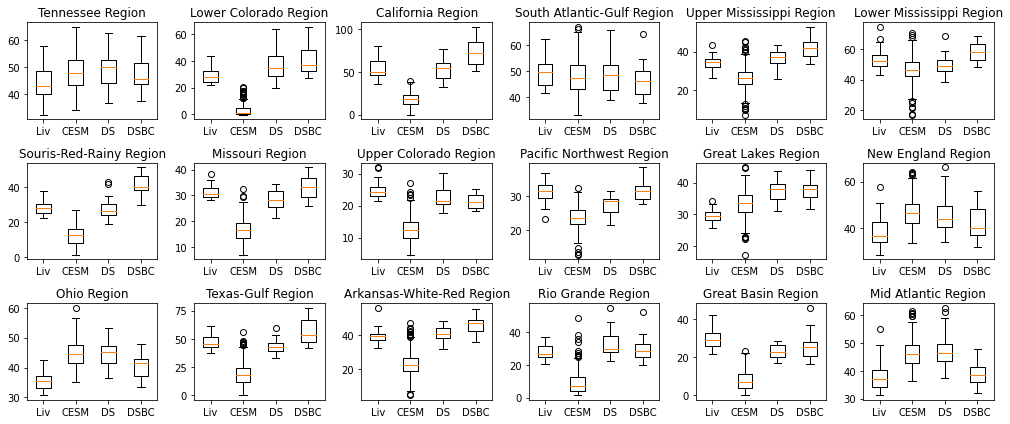

In [191]:
fig = plt.figure(figsize=(14,6))

prec_year_liv       = ds_prec_shp_liv.p99_year_3d
prec_year_cesm      = ds_prec_shp_cesm.p99_year_4d
prec_year_cesm_ds   = ds_p95_shp_cesm_ds.p99_year_4d
prec_year_cesm_dsbc = ds_p95_shp_cesm_dsbc.p99_year_4d

# use where to define missing value and then
# remove missing value with dropna
prec_year_liv = prec_year_liv.where( prec_year_liv < 1000, drop=True).dropna('year',how='any')
prec_year_cesm = prec_year_cesm.where( prec_year_cesm < 1000, drop=True).dropna('year',how='any')
prec_year_cesm_ds = prec_year_cesm_ds.where( prec_year_cesm_ds < 1000, drop=True).dropna('year',how='any')
prec_year_cesm_dsbc = prec_year_cesm_dsbc.where(prec_year_cesm_dsbc < 1000, drop=True).dropna('year',how='any')

plot_box_shp_4(prec_year_liv, prec_year_cesm, prec_year_cesm_ds, prec_year_cesm_dsbc)

plt.savefig(dir_plot + "p99_box_huc2.png")

 - P95

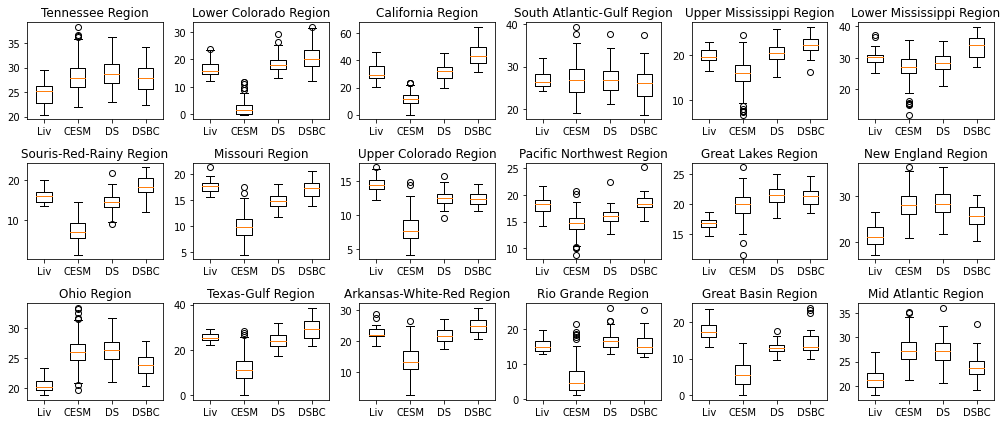

In [192]:
fig = plt.figure(figsize=(14,6))

prec_year_liv       = ds_prec_shp_liv.p95_year_3d
prec_year_cesm      = ds_prec_shp_cesm.p95_year_4d
prec_year_cesm_ds   = ds_p95_shp_cesm_ds.p95_year_4d
prec_year_cesm_dsbc = ds_p95_shp_cesm_dsbc.p95_year_4d

# use where to define missing value and then
# remove missing value with dropna
prec_year_liv = prec_year_liv.where( prec_year_liv < 1000, drop=True).dropna('year',how='any')
prec_year_cesm = prec_year_cesm.where( prec_year_cesm < 1000, drop=True).dropna('year',how='any')
prec_year_cesm_ds = prec_year_cesm_ds.where( prec_year_cesm_ds < 1000, drop=True).dropna('year',how='any')
prec_year_cesm_dsbc = prec_year_cesm_dsbc.where(prec_year_cesm_dsbc < 1000, drop=True).dropna('year',how='any')

plot_box_shp_4(prec_year_liv, prec_year_cesm, prec_year_cesm_ds, prec_year_cesm_dsbc)

plt.savefig(dir_plot + "p95_box_huc2.png")

 - N99

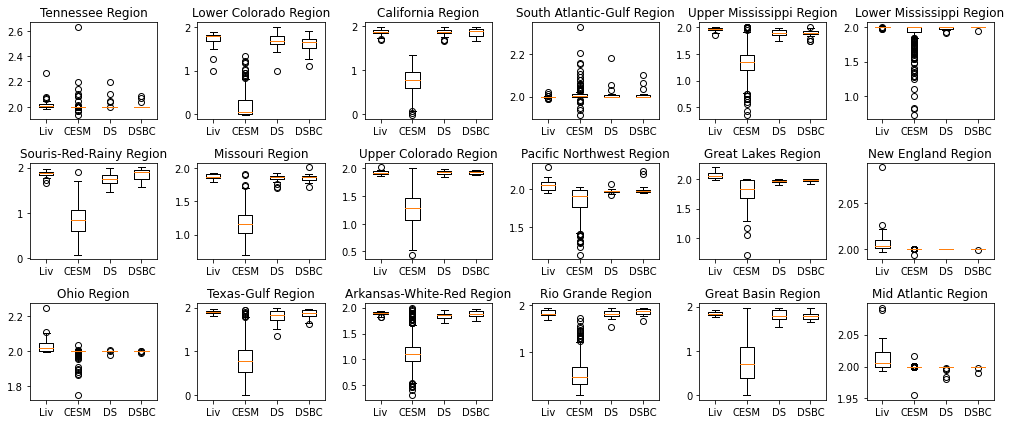

In [193]:
fig = plt.figure(figsize=(14,6))

prec_year_liv       = ds_prec_shp_liv.n99_year_3d
prec_year_cesm      = ds_prec_shp_cesm.n99_year_4d
prec_year_cesm_ds   = ds_p95_shp_cesm_ds.n99_year_4d
prec_year_cesm_dsbc = ds_p95_shp_cesm_dsbc.n99_year_4d

# use where to define missing value and then
# remove missing value with dropna
prec_year_liv = prec_year_liv.where( prec_year_liv < 1000, drop=True).dropna('year',how='any')
prec_year_cesm = prec_year_cesm.where( prec_year_cesm < 1000, drop=True).dropna('year',how='any')
prec_year_cesm_ds = prec_year_cesm_ds.where( prec_year_cesm_ds < 1000, drop=True).dropna('year',how='any')
prec_year_cesm_dsbc = prec_year_cesm_dsbc.where(prec_year_cesm_dsbc < 1000, drop=True).dropna('year',how='any')

plot_box_shp_4(prec_year_liv, prec_year_cesm, prec_year_cesm_ds, prec_year_cesm_dsbc)

plt.savefig(dir_plot + "n99_box_huc2.png")

 - N95

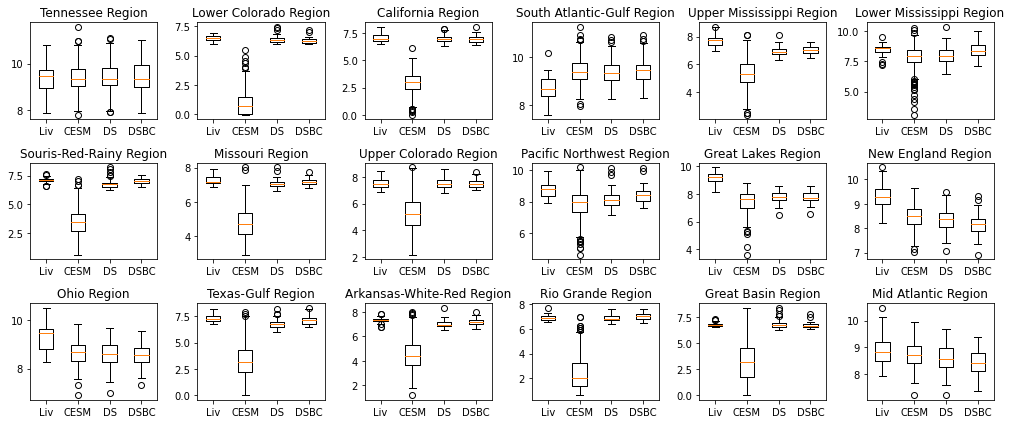

In [98]:
fig = plt.figure(figsize=(14,6))

prec_year_liv       = ds_prec_shp_liv.n95_year_3d
prec_year_cesm      = ds_prec_shp_cesm.n95_year_4d
prec_year_cesm_ds   = ds_p95_shp_cesm_ds.n95_year_4d
prec_year_cesm_dsbc = ds_p95_shp_cesm_dsbc.n95_year_4d

# use where to define missing value and then
# remove missing value with dropna
prec_year_liv = prec_year_liv.where( prec_year_liv < 1000, drop=True).dropna('year',how='any')
prec_year_cesm = prec_year_cesm.where( prec_year_cesm < 1000, drop=True).dropna('year',how='any')
prec_year_cesm_ds = prec_year_cesm_ds.where( prec_year_cesm_ds < 1000, drop=True).dropna('year',how='any')
prec_year_cesm_dsbc = prec_year_cesm_dsbc.where(prec_year_cesm_dsbc < 1000, drop=True).dropna('year',how='any')

plot_box_shp_4(prec_year_liv, prec_year_cesm, prec_year_cesm_ds, prec_year_cesm_dsbc)

plt.savefig(dir_plot + "n95_box_huc2.png")